 <center><h1>Analyse Stratégique pour Réduire le Turnover chez HumanForYou</h1></center>
    <p>L'entreprise pharmaceutique indienne HumanForYou, comptant environ 4000 employés, fait face à un taux de rotation annuel d'environ 15%. La direction est préoccupée par les conséquences néfastes de ce taux sur les opérations de l'entreprise, notamment :</p>
    <ul>
        <li>Retards dans les projets attribués aux employés sortants, impactant la réputation de l'entreprise auprès des clients et partenaires.</li>
        <li>Nécessité de maintenir un service des ressources humaines important pour le recrutement continu.</li>
        <li>Perte de temps due à la formation et à l'adaptation des nouveaux employés.</li>
    </ul>
    <p>La direction sollicite votre expertise en analyse de données pour identifier les principaux facteurs de rotation du personnel et développer des modèles visant à améliorer la rétention des employés.</p>

<b style='color:#3366cc' > Objectif Principal du Projet : </b><p>La direction de l'entreprise HumanForYou sollicite notre expertise en tant qu'experts en analyse de données. L'objectif principal du projet est :</p>
    <blockquote>
        <p>Identifier les principaux facteurs influençant le taux de rotation du personnel et développer des modèles analytiques. Ces modèles visent à fournir des pistes d'amélioration afin d'inciter les employés à rester au sein de l'entreprise pharmaceutique indienne HumanForYou.</p>
    </blockquote>
    <p>Le but ultime est d'apporter des solutions fondées sur des données pour optimiser la rétention des employés et atténuer les défis associés à la rotation du personnel.</p>

### **Import des bibliothèques**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from work_tools import *
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings("ignore")

### **Import des données**

<h4 >Ensemble de Données Pré-traitées des Employés</h4>
    <p>Cet ensemble de données regroupe plusieurs fichiers CSV liés aux enquêtes et aux données des employés, comprenant à la fois les nouveaux employés ainsi que les gestionnaires, au sein d'une entreprise. Ces données ont été préalablement traitées et sont structurées comme suit :</p>
    <ul>
        <li><strong>new_employee_survey.csv :</strong>
            <ul>
                <li>Réponses préalablement traitées aux enquêtes remplies par les anciens employés.</li>
                <li>Informations sur les perceptions, les attentes et les premières impressions des employés, après traitement des données.</li>
            </ul>
        </li>
        <li><strong>new_general_data.csv :</strong>
            <ul>
                <li>Données générales pré-traitées sur l'ensemble des employés.</li>
                <li>Détails tels que le nom, le département, le poste et d'autres informations démographiques ayant fait l'objet d'un prétraitement.</li>
            </ul>
        </li>
        <li><strong>new_manager_survey.csv :</strong>
            <ul>
                <li>Réponses préalablement traitées aux enquêtes remplies par les gestionnaires des employés.</li>
                <li>Évaluations initiales, commentaires sur l'intégration et informations sur la performance perçue des membres de l'équipe, suite à un traitement des données.</li>
            </ul>
        </li>
        <li><strong>in_out_time.csv :</strong>
            <ul>
                <li>Données pré-traitées sur les heures d'arrivée et de départ de l'ensemble des employés.</li>
                <li>Informations sur la ponctualité, les habitudes de travail et les horaires de présence, après traitement des données.</li>
            </ul>
        </li>
    </ul>
    <p>Ces ensembles de données, après avoir été préalablement traités, offrent une perspective complète sur l'expérience des employés, leur intégration dans l'entreprise, ainsi que des informations liées à leur présence et à leur temps de travail. L'analyse de ces données pré-traitées pourrait aider à identifier des tendances, à comprendre les facteurs influençant la rétention, et à formuler des stratégies d'amélioration de l'expérience globale des employés.</p>

In [2]:
new_employee_survey = pd.read_csv('./new_employee_survey.csv')
new_general_data = pd.read_csv('./new_general_data.csv')
new_manager_survey = pd.read_csv('./new_manager_survey.csv')
in_out_time = pd.read_csv('./in_out_time.csv')

#### **Unification des Données Employés** 
**Fusion pour une Vue Globale**

In [3]:
# Concaténation verticale (ajout de lignes)
final_data = new_employee_survey.merge(new_general_data, on="EmployeeID", how="inner").drop_duplicates()\
                .merge(new_manager_survey, on="EmployeeID", how="inner").drop_duplicates()\
                .merge(in_out_time, on="EmployeeID", how="inner").drop_duplicates()

In [4]:
#Vision de jeu de données
final_data

,EmployeeID,tauxSatisfactionGlobal,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,tauxEvaluation,average_start_time,average_end_time,difference_temps
0,1,3.00,51.0,No,Travel_Rarely,Sales,6.0,2.0,Life Sciences,Female,...,0.0,1.0,3.0,1.0,0.0,0.0,3.0,09:59:50.120481,17:23:34.939759,07:23:44.819278
1,2,3.00,31.0,Yes,Travel_Frequently,Research & Development,10.0,1.0,Life Sciences,Female,...,1.0,6.0,3.0,5.0,1.0,4.0,3.0,09:59:5.542168,17:39:25.542168,07:40:20.000000
2,3,1.67,32.0,No,Travel_Frequently,Research & Development,17.0,4.0,Other,Male,...,1.0,5.0,2.0,5.0,0.0,3.0,3.0,10:00:47.228915,17:02:25.783132,07:01:38.554217
3,4,3.67,38.0,No,Non-Travel,Research & Development,2.0,5.0,Life Sciences,Male,...,1.0,13.0,3.0,8.0,1.0,5.0,2.5,09:58:10.602409,17:12:52.289156,07:14:41.686747
4,5,2.67,32.0,No,Travel_Rarely,Research & Development,10.0,1.0,Medical,Male,...,2.0,9.0,2.0,6.0,0.0,4.0,3.0,09:59:14.939759,18:02:24.096385,08:03:9.156626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,2.67,42.0,No,Travel_Rarely,Research & Development,5.0,4.0,Medical,Female,...,1.0,10.0,3.0,3.0,0.0,2.0,3.0,10:00:43.132530,18:29:15.903614,08:28:32.771084
4406,4407,3.67,29.0,No,Travel_Rarely,Research & Development,2.0,4.0,Medical,Male,...,0.0,10.0,2.0,3.0,0.0,2.0,2.5,09:59:46.265060,16:08:14.939759,06:08:28.674699
4407,4408,2.33,25.0,No,Travel_Rarely,Research & Development,25.0,2.0,Life Sciences,Male,...,0.0,5.0,4.0,4.0,1.0,2.0,3.5,09:59:6.506024,17:49:15.662650,07:50:9.156626
4408,4409,2.67,42.0,No,Travel_Rarely,Sales,18.0,2.0,Medical,Male,...,1.0,10.0,2.0,9.0,1.0,8.0,2.5,10:00:36.626506,19:25:25.542168,09:24:48.915662


#### **Explore des Données**

In [5]:
# Affichage des noms de colonnes dans le DataFrame final_data
final_data.columns

Index(['EmployeeID', 'tauxSatisfactionGlobal', 'Age', 'Attrition',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'tauxEvaluation', 'average_start_time', 'average_end_time',
       'difference_temps'],
      dtype='object')

In [6]:
# Comptage du nombre d'occurrences de chaque valeur dans la colonne 'Attrition'
final_data['Attrition'].value_counts()

Attrition
No     3699
Yes     711
Name: count, dtype: int64

* Cette instruction fournit des informations essentielles sur la répartition des valeurs dans la colonne 'Attrition'.

* Elle indique le nombre d'employés ayant quitté l'entreprise (Attrition) par rapport à ceux qui y sont restés.

In [65]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2.205500e+03,1273.201673,1.000000e+00,1.103250e+03,2.205500e+03,3.307750e+03,4.410000e+03
tauxSatisfactionGlobal,4410.0,2.739361e+00,0.565926,1.000000e+00,2.330000e+00,2.670000e+00,3.330000e+00,4.000000e+00
Age,4410.0,3.692381e+01,9.133301,1.800000e+01,3.000000e+01,3.600000e+01,4.300000e+01,6.000000e+01
Attrition,4410.0,1.612245e-01,0.367780,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
BusinessTravel,4410.0,1.607483e+00,0.665304,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
Department,4410.0,1.260544e+00,0.527673,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
DistanceFromHome,4410.0,9.192517e+00,8.105026,1.000000e+00,2.000000e+00,7.000000e+00,1.400000e+01,2.900000e+01
Education,4410.0,2.912925e+00,1.023933,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
EducationField,4410.0,2.247619e+00,1.331067,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Gender,4410.0,6.000000e-01,0.489954,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Comptage des valeurs manquantes dans chaque colonne du DataFrame final_data
final_data.isna().sum()

EmployeeID                 0
tauxSatisfactionGlobal     0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
tauxEvaluation             0
average_start_time         0
average_end_time           0
difference_temps           0
dtype: int64

* Cette ligne de code permet d'identifier le nombre de valeurs manquantes (NaN) dans chaque colonne du DataFrame.

* C'est une étape cruciale pour évaluer la qualité des données et prendre des mesures appropriées, telles que l'imputation des données manquantes.

#### **Prétraitement des données**

In [8]:
# Conversion de la colonne 'average_start_time' en timedelta
final_data['average_start_time'] = pd.to_datetime(final_data['average_start_time']).astype(np.int64) // 10**9

# Conversion de la colonne 'average_end_time' en timedelta
final_data['average_end_time'] = pd.to_datetime(final_data['average_end_time']).astype(np.int64) // 10**9

# Conversion de la colonne 'difference_temps' en timedelta
final_data['difference_temps'] = pd.to_datetime(final_data['difference_temps']).astype(np.int64) // 10**9


* Ces trois lignes de code convertissent les colonnes 'average_start_time', 'average_end_time' et 'difference_temps' en timedelta, ce qui est crucial pour une manipulation appropriée des données temporelles. Cette transformation uniformise la représentation des heures de début et de fin, ainsi que des écarts de temps, facilitant ainsi les calculs et les analyses axées sur le temps dans le jeu de données.

**`Le LabelEncoder` est une composante importante du prétraitement des données, contribuant à la conversion efficace des attributs catégoriques en représentations numériques pour une utilisation optimale dans les modèles d'apprentissage automatique.**

In [9]:
from sklearn.preprocessing import LabelEncoder

def label_encode_all_columns(data):
    """
    Encode all non-numeric columns in a DataFrame using LabelEncoder.

    Parameters:
    - data: pandas DataFrame
      (Le DataFrame contenant les données à encoder)

    Returns:
    - DataFrame with non-numeric columns encoded
      (Le DataFrame avec les colonnes non numériques encodées)
    """
    le = LabelEncoder()

    # Parcours de toutes les colonnes du DataFrame
    for column in data.columns:
        # Vérification si la colonne est de type 'object' (non numérique)
        if data[column].dtype == 'object':
            # Application de LabelEncoder pour encoder la colonne
            data[column] = le.fit_transform(data[column])

    return data

In [10]:
#Appliquer le codage des étiquettes à toutes les colonnes du DataFrame 'final_data'
final_data = label_encode_all_columns(final_data)

In [11]:
# Séparer les caractéristiques (X) et la variable cible (y)
X = final_data.drop(['Attrition'], axis=1)  # X contient toutes les colonnes sauf 'Attrition'
y = final_data['Attrition']  # y contient uniquement la colonne 'Attrition', qui est notre variable cible

#### **Génération d'échantillons synthétiques avec SMOTE pour l'équilibrage des classes**

In [12]:
# Instanciation de l'objet SMOTE (Synthetic Minority Over-sampling Technique) avec une graine aléatoire fixe (random_state=42)
smote = SMOTE(random_state=42)
# Application de la technique SMOTE pour créer des échantillons synthétiques et équilibrer les classes du jeu de données
X_resampled, y_resampled = smote.fit_resample(X, y)

In [13]:
# Conversion des tableaux résultants X_resampled et y_resampled en DataFrames pandas
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)

In [14]:
# Cela permet de vérifier visuellement l'équilibrage des classes après l'application de la technique SMOTE
y_resampled.value_counts()

Attrition
0            3699
1            3699
Name: count, dtype: int64

* Dans ces lignes de code, la méthode value_counts() est utilisée sur la série pandas y_resampled pour compter le nombre d'occurrences de chaque valeur unique. Cela peut être utile pour évaluer visuellement l'équilibrage des classes après l'application de la technique SMOTE. Les résultats sont stockés dans la variable class_counts et affichés ensuite.

In [15]:
# Affichage des noms de colonnes dans la variable X_resampled
X_resampled.columns

Index(['EmployeeID', 'tauxSatisfactionGlobal', 'Age', 'BusinessTravel',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'tauxEvaluation',
       'average_start_time', 'average_end_time', 'difference_temps'],
      dtype='object')

In [16]:
# Cela permet de vérifier le nombre d'échantillons synthétiques générés et le nombre de caractéristiques
X_resampled.shape

(7398, 25)

In [17]:
# La fonction check_for_duplicates est  définie  dans le fichier work_tools.py et elle devrait effectuer une vérification des doublons dans le DataFrame X_resampled.
check_for_duplicates(X_resampled)

Empty DataFrame
Columns: [EmployeeID, tauxSatisfactionGlobal, Age, BusinessTravel, Department, DistanceFromHome, Education, EducationField, Gender, JobLevel, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager, tauxEvaluation, average_start_time, average_end_time, difference_temps]
Index: []

[0 rows x 25 columns]
Number of duplicates: 0
The DataFrame does not contain duplicates.


 * l'élimination des doublons dans un ensemble de données est souvent effectuée pour maintenir la qualité des données, assurer des analyses précises, optimiser les performances, garantir l'intégrité des données, et se conformer aux exigences de structure des données

#### **Division de données (splitting)**

In [18]:
# Utilisation de la fonction train_test_split de scikit-learn pour diviser les données équilibrées avec SMOTE
# test_size définit la proportion d'échantillons à inclure dans l'ensemble de test (ici, 30%)
# random_state assure la reproductibilité des résultats en fixant la graine aléatoire
# stratify=y_resampled garantit que la distribution des classes est préservée dans les ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (5178, 25) Test: (2220, 25)


In [19]:
# Cela permet de vérifier la distribution des classes dans l'ensemble d'entraînement
y_train.value_counts()

Attrition
0            2589
1            2589
Name: count, dtype: int64

**Standardisation des caractéristiques dans les ensembles d'entraînement et de test**

In [20]:
# Utilisation d'un objet scaler pour standardiser les caractéristiques de l'ensemble d'entraînement
scaler = StandardScaler() 
# Ajustement (fit) du scaler aux données d'entraînement
scaler.fit(X_train)

StandardScaler()

* la méthode fit sur l'objet scaler pour ajuster (fit) le scaler aux données d'entraînement. Il souligne également l'importance de ne pas ajuster le scaler aux données de test afin d'éviter les fuites d'information, ce qui est une bonne pratique en prétraitement des données.

In [21]:
# Transformation des caractéristiques de l'ensemble d'entraînement en utilisant le scaler
X_train_scaled = scaler.transform(X_train) 
# Conversion des données standardisées de l'ensemble d'entraînement en DataFrame pandas
# Cela permet de maintenir les index et les noms de colonnes pour la cohérence avec les données originales
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns) 
# Transformation des caractéristiques de l'ensemble de test en utilisant le même scaler
X_test_scaled = scaler.transform(X_test) 
# Conversion des données standardisées de l'ensemble de test en DataFrame pandas
# pour conserver la cohérence avec les données originales (index et noms de colonnes)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns) 

Après normalisation, la moyenne des valeurs d'expression pour chaque gène dans le dataset **X_train_scaled** doit être égale 0. Vérifiez que c'est réellement le cas. Pour cela, calculez la moyenne à l'aide de la méthode `mean()` et affichez quelques premières valeurs avec `head()`.

In [22]:
X_train_scaled.mean().head(5)

EmployeeID                1.729015e-16
tauxSatisfactionGlobal    9.296885e-17
Age                       2.689579e-16
BusinessTravel            4.391149e-17
Department               -9.262579e-18
dtype: float64

Après normalisation, l'écart-type doit être égal à 1. Vérifiez-le en calculant l'écart-type du dataset **X_train_scaled** à l'aide de la méthode `std()`. Affichez quelques premières valeurs avec `head()`.

In [23]:
X_train_scaled.std().head(8)

EmployeeID                1.000097
tauxSatisfactionGlobal    1.000097
Age                       1.000097
BusinessTravel            1.000097
Department                1.000097
DistanceFromHome          1.000097
Education                 1.000097
EducationField            1.000097
dtype: float64

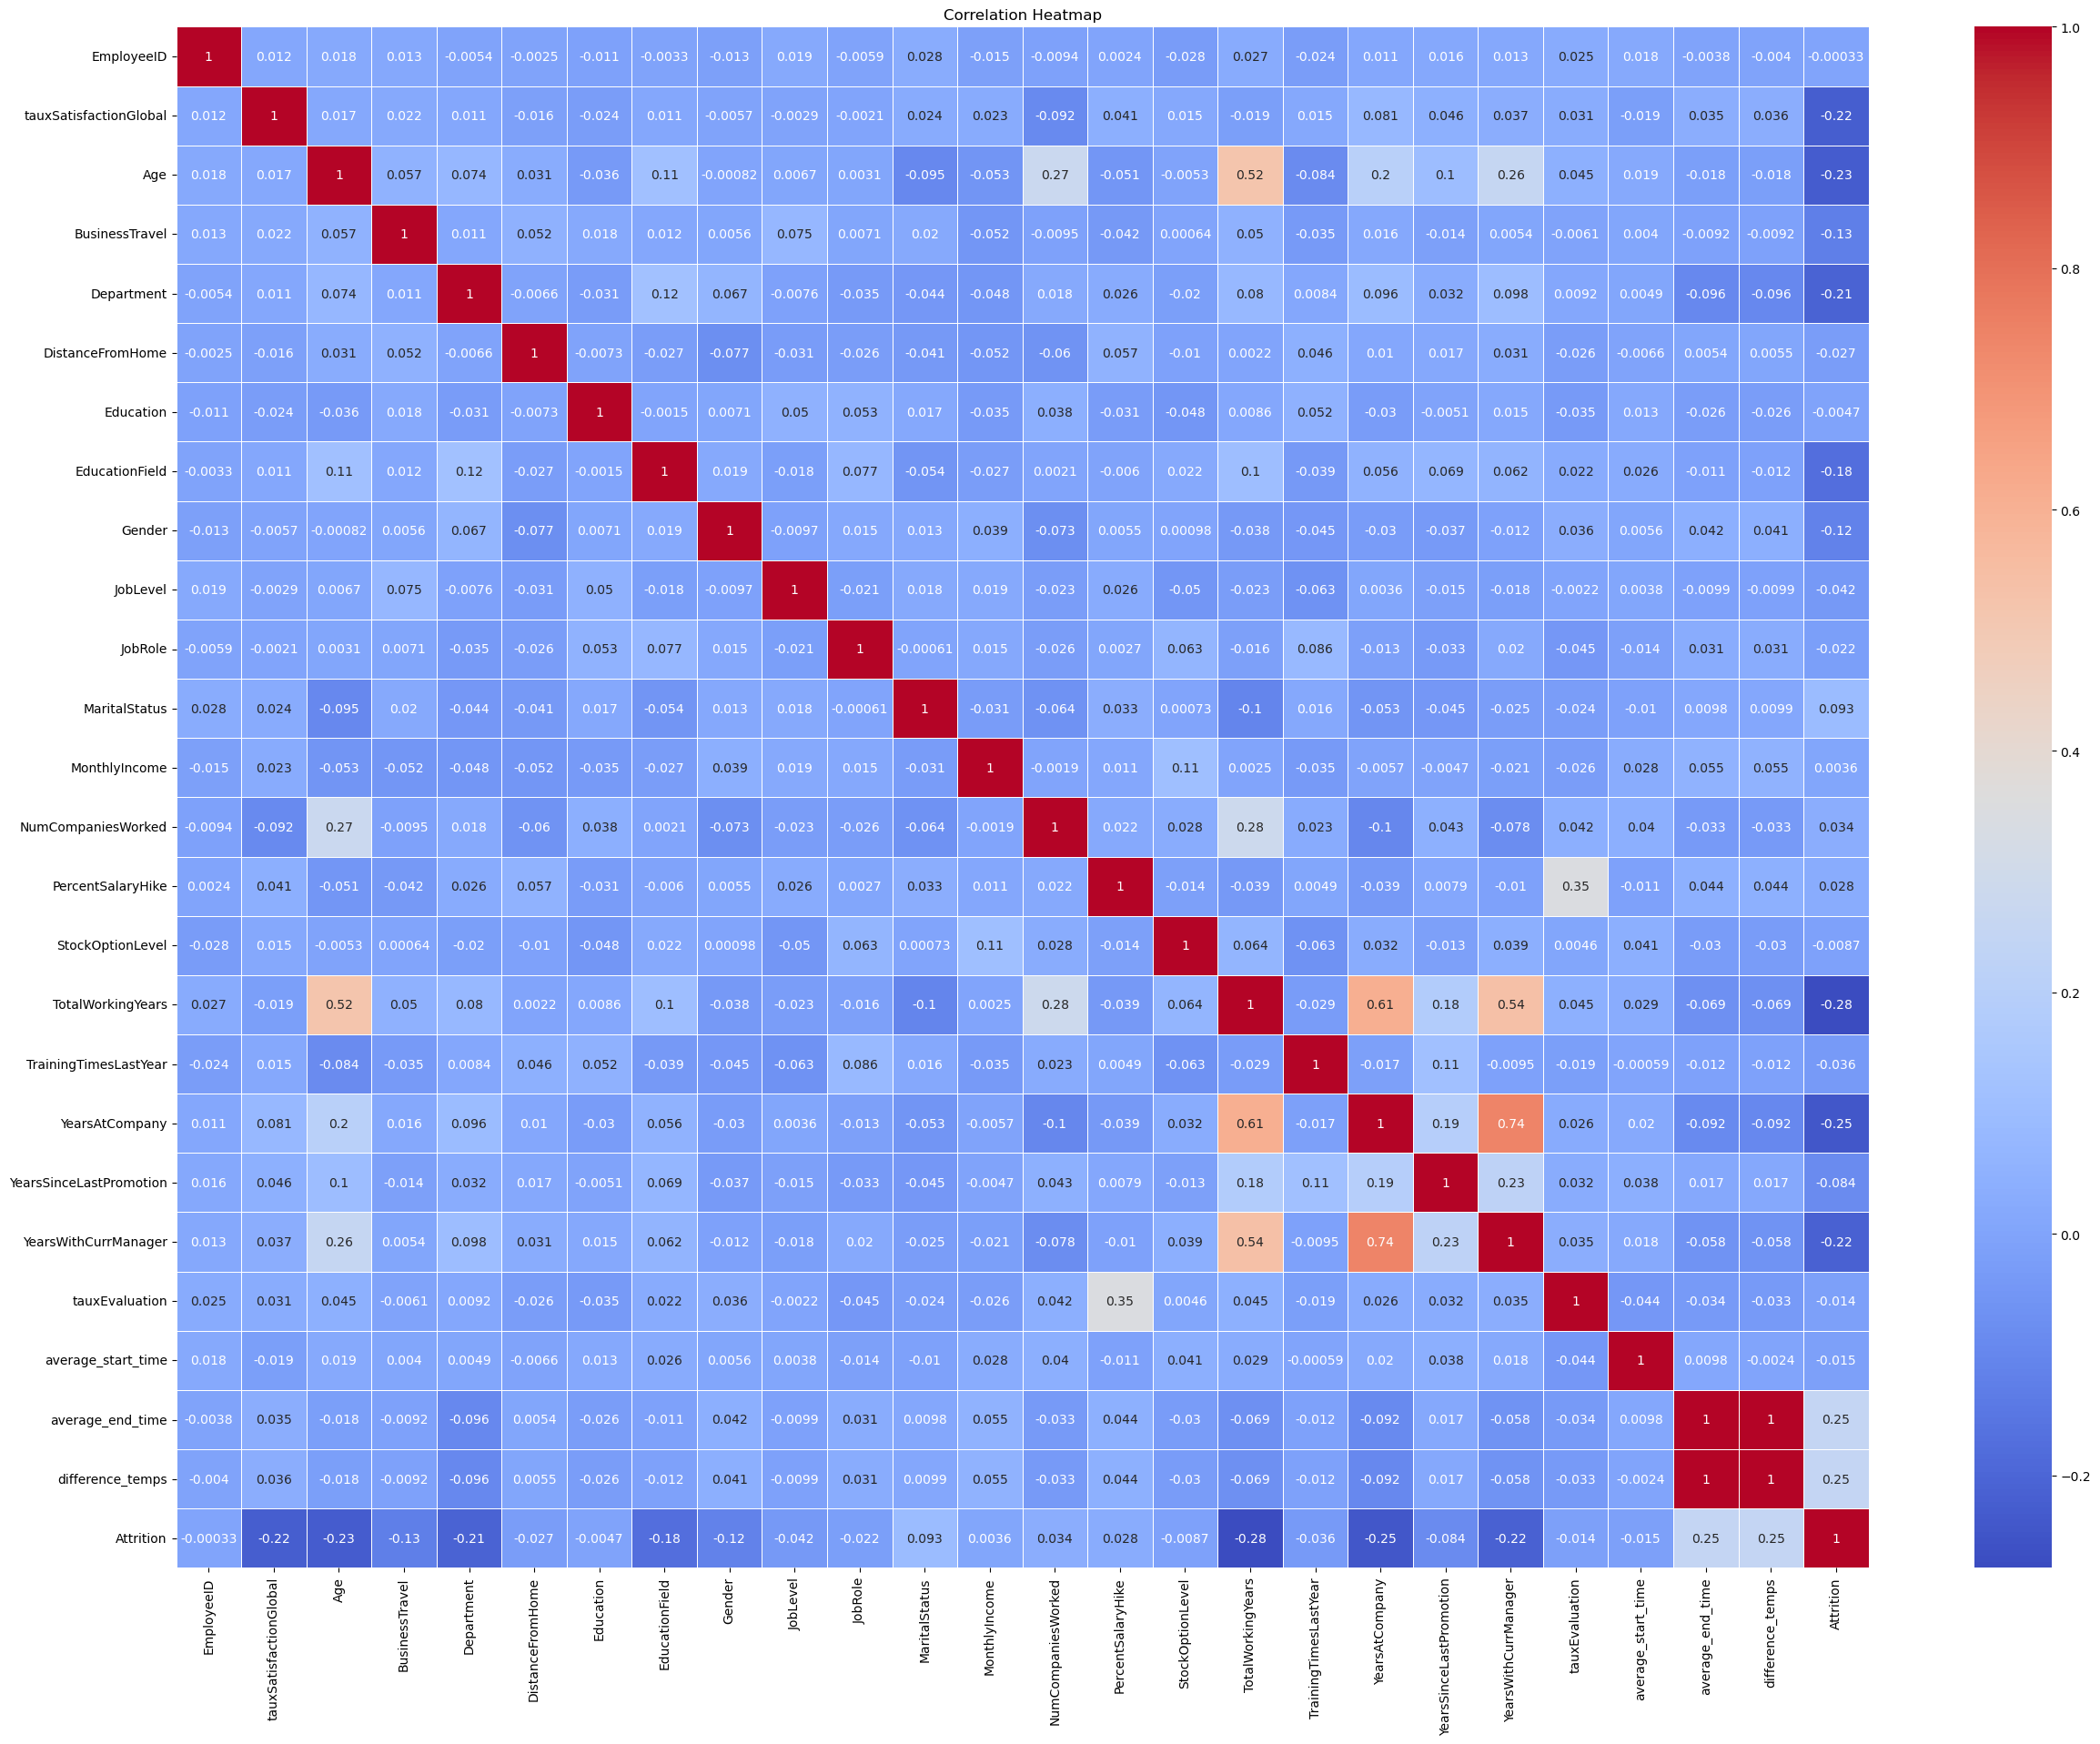

In [24]:
# Concaténation des caractéristiques standardisées X_train_scaled et de la variable cible y_train le long des colonnes
combined_data = pd.concat([X_train_scaled, y_train], axis=1)
# Calcul de la matrice de corrélation entre toutes les caractéristiques et la variable cible
correlation_matrix = combined_data.corr()
# Création d'une carte thermique (heatmap) pour visualiser la corrélation
plt.figure(figsize=(30, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Affichage de la corrélation spécifique entre les caractéristiques et la variable cible 'Attrition'
pd.DataFrame(correlation_matrix['Attrition'])

,Attrition
EmployeeID,-0.000332
tauxSatisfactionGlobal,-0.223845
Age,-0.231103
BusinessTravel,-0.125919
Department,-0.209987
DistanceFromHome,-0.026549
Education,-0.004743
EducationField,-0.175567
Gender,-0.115916
JobLevel,-0.042234


In [26]:
def get_correlated_columns(data, threshold=0.44):
    """
    Get columns with correlation greater than threshold or less than -threshold with 'Credibility'.

    Parameters:
        data (DataFrame): The input DataFrame.
        threshold (float): The correlation threshold. Default is 0.44.

    Returns:
        DataFrame: A DataFrame containing columns with correlation above or below the threshold.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Get the correlation with 'Credibility' column
    correlation_with_credibility = correlation_matrix['Attrition']

    # Filter columns based on the threshold
    correlated_columns = correlation_with_credibility[
        (correlation_with_credibility > threshold) | (correlation_with_credibility < -threshold)
    ]

    # Create a DataFrame containing the correlated columns
    correlated_data = data[correlated_columns.index]

    return correlated_data

* Cette fonction get_correlated_columns prend un DataFrame en entrée, calcule la matrice de corrélation, puis identifie et renvoie les colonnes dont la corrélation avec la variable cible 'Attrition' est supérieure à un seuil donné ou inférieure à son opposé. Elle peut être utilisée pour sélectionner les caractéristiques fortement corrélées avec 'Attrition' dans le contexte de l'analyse ou de la modélisation des données.

In [27]:
#Exécution de la fonction pour extraire les colonnes fortement corrélées avec 'Attrition'
corr_col = get_correlated_columns(combined_data, 0.2)
corr_col

,tauxSatisfactionGlobal,Age,Department,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,average_end_time,difference_temps,Attrition
4247,-1.767417,2.083877,-0.288686,2.307991,-0.261123,-0.156186,-0.240545,-0.210157,0
5996,-0.004095,-1.074308,-0.288686,0.093170,0.649629,-1.113856,0.904114,0.902535,1
3,1.850379,0.279200,-0.288686,1.477433,0.953213,0.482260,-0.520190,-0.503987,0
4754,0.041481,0.422947,-2.192911,-0.366947,0.348191,0.381116,-0.877858,-0.866603,1
6590,0.274297,0.388383,-0.288686,0.205605,0.127751,0.272699,1.593373,1.589165,1
...,...,...,...,...,...,...,...,...,...
6595,1.147941,-0.444278,-0.288686,-1.210011,-0.520251,-0.475410,0.716452,0.720406,1
4220,-1.767417,-0.059177,-2.192911,-0.737388,-0.564707,-0.475410,-1.157504,-1.159612,0
5147,-1.594314,-0.547367,-0.288686,-0.247522,0.544624,0.991889,1.853308,1.861024,1
4755,-1.261873,0.601676,-0.288686,0.795740,-0.914077,-0.671129,0.224300,0.214263,1


**Recherche de corrélation** *Les variables d'un jeu de données peuvent être liées deux à deux (plus ou moins fortement, positivement ou négativement), c'est pourquoi on calcule leur corrélation.*

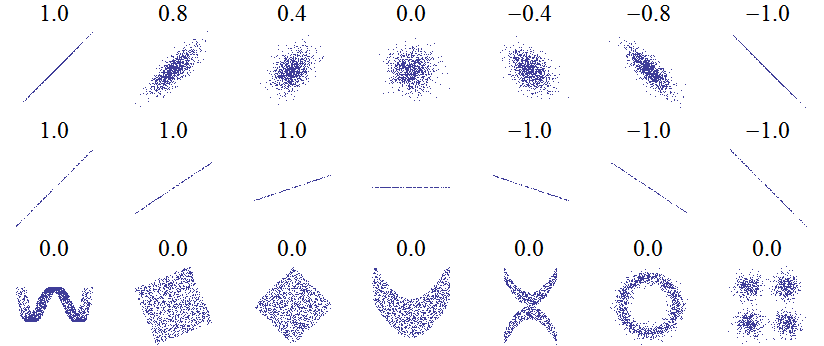

In [28]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png")

<Axes: xlabel='average_end_time', ylabel='difference_temps'>

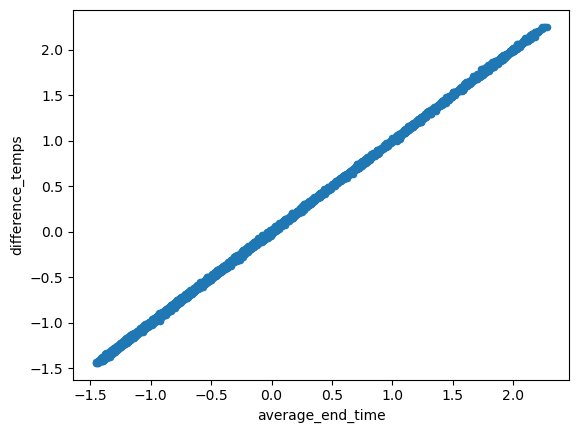

In [29]:
# Utilisation de la méthode plot pour créer un nuage de points illustrant la corrélation
# entre les caractéristiques 'average_end_time' et 'difference_temps' dans le DataFrame combined_data
combined_data.plot(kind="scatter", x="average_end_time", y="difference_temps")

In [30]:
# Suppression des colonnes 'average_end_time' et 'Attrition' du DataFrame corr_col
# Cela peut être une étape de prétraitement pour éliminer des colonnes spécifiques avant l'analyse ou la modélisation
corr_col = corr_col.drop(['average_end_time','Attrition'],axis=1)

In [31]:
corr_col

,tauxSatisfactionGlobal,Age,Department,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,difference_temps
4247,-1.767417,2.083877,-0.288686,2.307991,-0.261123,-0.156186,-0.210157
5996,-0.004095,-1.074308,-0.288686,0.093170,0.649629,-1.113856,0.902535
3,1.850379,0.279200,-0.288686,1.477433,0.953213,0.482260,-0.503987
4754,0.041481,0.422947,-2.192911,-0.366947,0.348191,0.381116,-0.866603
6590,0.274297,0.388383,-0.288686,0.205605,0.127751,0.272699,1.589165
...,...,...,...,...,...,...,...
6595,1.147941,-0.444278,-0.288686,-1.210011,-0.520251,-0.475410,0.720406
4220,-1.767417,-0.059177,-2.192911,-0.737388,-0.564707,-0.475410,-1.159612
5147,-1.594314,-0.547367,-0.288686,-0.247522,0.544624,0.991889,1.861024
4755,-1.261873,0.601676,-0.288686,0.795740,-0.914077,-0.671129,0.214263


In [32]:
# Sélection des colonnes du DataFrame X_train_scaled en utilisant les colonnes de corr_col
# Cela réduit X_train_scaled aux caractéristiques spécifiques présentes dans corr_col
X_train_scaled = X_train_scaled[corr_col.columns]
# Affichage du DataFrame résultant après la sélection des caractéristiques
X_train_scaled

,tauxSatisfactionGlobal,Age,Department,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,difference_temps
4247,-1.767417,2.083877,-0.288686,2.307991,-0.261123,-0.156186,-0.210157
5996,-0.004095,-1.074308,-0.288686,0.093170,0.649629,-1.113856,0.902535
3,1.850379,0.279200,-0.288686,1.477433,0.953213,0.482260,-0.503987
4754,0.041481,0.422947,-2.192911,-0.366947,0.348191,0.381116,-0.866603
6590,0.274297,0.388383,-0.288686,0.205605,0.127751,0.272699,1.589165
...,...,...,...,...,...,...,...
6595,1.147941,-0.444278,-0.288686,-1.210011,-0.520251,-0.475410,0.720406
4220,-1.767417,-0.059177,-2.192911,-0.737388,-0.564707,-0.475410,-1.159612
5147,-1.594314,-0.547367,-0.288686,-0.247522,0.544624,0.991889,1.861024
4755,-1.261873,0.601676,-0.288686,0.795740,-0.914077,-0.671129,0.214263


In [33]:
# Sélection des colonnes du DataFrame X_test_scaled en utilisant les colonnes de corr_col
# Cela garantit que l'ensemble de test conserve les mêmes caractéristiques que l'ensemble d'entraînement
X_test_scaled = X_test_scaled[corr_col.columns]

# Affichage du DataFrame résultant après la sélection des caractéristiques pour l'ensemble de test
X_test_scaled

,tauxSatisfactionGlobal,Age,Department,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,difference_temps
1802,1.235354,-0.284761,-0.288686,1.754285,2.471133,1.120706,-0.616714
2904,0.638418,0.166408,1.615539,0.646875,1.560381,1.120706,1.445843
2635,1.850379,-1.525477,-2.192911,-1.014241,-0.564707,-0.475410,-1.071730
49,-1.170480,0.279200,-0.288686,0.646875,1.560381,-0.794633,-0.512816
2633,-1.170480,1.294331,-0.288686,1.754285,2.471133,2.716821,-0.398447
...,...,...,...,...,...,...,...
6311,-0.412457,-0.806477,-0.288686,-0.115220,0.344948,0.481106,-0.950789
477,-0.573544,1.407123,-2.192911,0.646875,-0.868291,-0.475410,0.014681
4382,0.638418,1.858292,-0.288686,-0.460536,-0.868291,-0.475410,-0.403991
2983,1.235354,-1.976646,1.615539,-2.121651,-1.475459,-1.113856,-0.698642


## **Choix des modeles**

### **LogisticRegression**

**Construction et entraînement d'un modèle de régression logistique**

In [34]:
# Importation de la classe LogisticRegression du module sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Importation de métriques d'évaluation du modèle
from sklearn.metrics import accuracy_score, classification_report

# Initialisation d'une instance du modèle de régression logistique
Log_reg = LogisticRegression()

# Entraînement du modèle sur l'ensemble d'entraînement standardisé (X_train_scaled, y_train)
Log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

**Évaluation des performances du modèle de régression logistique**

In [35]:
# Importation de la fonction mean_squared_error du module sklearn.metrics
from sklearn.metrics import mean_squared_error

# Prédictions sur l'ensemble de test à l'aide du modèle de régression logistique entraîné
attrition_predictions = Log_reg.predict(X_test_scaled)

# Calcul de l'erreur quadratique moyenne (MSE) entre les prédictions et les vraies valeurs
log_mse = mean_squared_error(y_test, attrition_predictions)

# Calcul de la racine carrée de l'erreur quadratique moyenne (RMSE)
log_rmse = np.sqrt(log_mse)

# Affichage de la valeur de RMSE, une métrique d'évaluation des performances du modèle
log_rmse


0.5377631348365088

**Évaluation détaillée des performances du modèle de régression logistique**

In [36]:
# Évaluer la performance du modèle en utilisant la métrique de précision
accuracy = accuracy_score(y_test, attrition_predictions)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher le rapport de classification qui fournit des mesures détaillées telles que la précision, le rappel et le F1-score
print("Rapport de classification :")
print(classification_report(y_test, attrition_predictions))


Précision du modèle : 0.71
Rapport de classification :
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1110
           1       0.71      0.70      0.71      1110

    accuracy                           0.71      2220
   macro avg       0.71      0.71      0.71      2220
weighted avg       0.71      0.71      0.71      2220



**Évaluation de la performance du modèle par validation croisée**

In [37]:
# Utilisation de la validation croisée pour évaluer la performance du modèle de régression logistique
# en utilisant la métrique de l'erreur quadratique moyenne négative (neg_mean_squared_error)
scores = cross_val_score(Log_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)

# Calcul des RMSE correspondant à chaque fold de la validation croisée
log_rmse_scores = np.sqrt(-scores)

# Affichage des RMSE pour chaque fold de la validation croisée
log_rmse_scores


array([0.53452248, 0.56438712, 0.5416976 , 0.52541581, 0.50861307,
       0.55053502, 0.50288742, 0.55923279, 0.54754596, 0.53322855])

**Visualisation de la matrice de confusion**

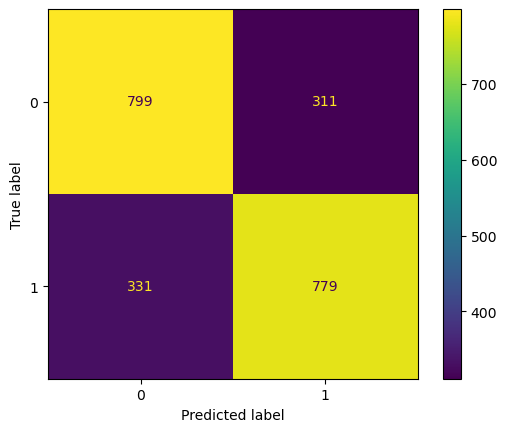

In [38]:
# Utilisation de ConfusionMatrixDisplay pour visualiser la matrice de confusion
# Cette fonction prend un estimateur (Log_reg), les données de test (X_test_scaled) et les étiquettes de test (y_test)
ConfusionMatrixDisplay.from_estimator(Log_reg, X_test_scaled, y_test)


==> l'analyse des résultats du modèle de régression logistique :

* La précision globale du modèle est de 71%, ce qui indique une performance raisonnable.

* Les métriques de précision, de rappel et de F1-score sont relativement équilibrées entre les classes 0 (non attrition) et 1 (attrition), suggérant une capacité équitable du modèle à prédire les deux classes.

* Le modèle a une précision d'environ 71% pour prédire correctement les employés restants et partants.

* Le rappel (sensibilité) pour la classe attrition est d'environ 70%, indiquant que le modèle capture une proportion significative des employés réellement en train de partir.

### **Naive Bayes**

**Construction et entraînement d'un modèle de classificateur Naive Bayes gaussien**

In [39]:
# Importation de la classe GaussianNB du module sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

# Initialisation d'une instance du modèle de classificateur Naive Bayes gaussien
nav_bay = GaussianNB()

# Entraînement du modèle sur l'ensemble d'entraînement standardisé (X_train_scaled, y_train)
nav_bay.fit(X_train_scaled, y_train)


GaussianNB()

**Évaluation des performances du modèle de classificateur Naive Bayes gaussien**

In [40]:
# Prédictions sur l'ensemble de test à l'aide du modèle Naive Bayes gaussien entraîné
attrition_predictions = nav_bay.predict(X_test_scaled)

# Calcul de l'erreur quadratique moyenne (MSE) entre les prédictions et les vraies valeurs
navB_mse = mean_squared_error(y_test, attrition_predictions)

# Calcul de la racine carrée de l'erreur quadratique moyenne (RMSE)
navB_rmse = np.sqrt(navB_mse)

# Affichage de la valeur de RMSE, une métrique d'évaluation des performances du modèle
navB_rmse


0.5647290668266677

**Évaluation détaillée des performances du modèle de classificateur Naive Bayes gaussien**

In [41]:
# Évaluer la performance du modèle en utilisant la métrique de précision
accuracy = accuracy_score(y_test, attrition_predictions)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher le rapport de classification qui fournit des mesures détaillées telles que la précision, le rappel et le F1-score
print("Rapport de classification :")
print(classification_report(y_test, attrition_predictions))


Précision du modèle : 0.68
Rapport de classification :
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      1110
           1       0.68      0.70      0.69      1110

    accuracy                           0.68      2220
   macro avg       0.68      0.68      0.68      2220
weighted avg       0.68      0.68      0.68      2220



**Évaluation de la performance du modèle de classificateur Naive Bayes gaussien par validation croisée**

In [42]:
from sklearn.model_selection import cross_val_score

# Utilisation de la validation croisée pour évaluer la performance du modèle de classificateur Naive Bayes gaussien
# en utilisant la métrique de l'erreur quadratique moyenne négative (neg_mean_squared_error)
scores = cross_val_score(nav_bay, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)

# Calcul des RMSE correspondant à chaque fold de la validation croisée
navB_rmse_scores = np.sqrt(-scores)

# Affichage des RMSE pour chaque fold de la validation croisée
navB_rmse_scores


array([0.56267425, 0.60404045, 0.5660948 , 0.53452248, 0.55923279,
       0.55053502, 0.55228553, 0.59437518, 0.57846592, 0.56493268])

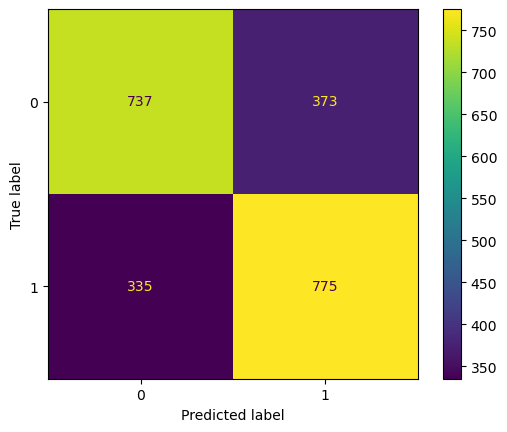

In [43]:
# Utilisation de ConfusionMatrixDisplay pour visualiser la matrice de confusion
# Cette fonction prend un estimateur (nav_bay), les données de test (X_test_scaled) et les étiquettes de test (y_test)
ConfusionMatrixDisplay.from_estimator(nav_bay, X_test_scaled, y_test) #Plot the confusion matrix given an estimator, the data, and the label.

==> Interprétation :
 * la précision du modèle de classificateur Naive Bayes gaussien est de 0.68. Cela signifie que le modèle a correctement prédit la classe des employés (attrition ou non attrition) environ 68% du temps sur l'ensemble de test. La précision mesure la qualité des prédictions positives, indiquant la capacité du modèle à identifier correctement les employés susceptibles de partir.
* Les métriques de précision, de rappel et de F1-score montrent un certain équilibre entre les classes, mais il existe une différence entre la capacité du modèle à prédire les employés qui restent (classe 0) par rapport à ceux qui partent (classe 1).
Pour une analyse plus approfondie, il peut être utile d'explorer d'autres modèles et d'affiner les caractéristiques du modèle pour améliorer les performances de prédiction de l'attrition.

### **Arbres de décision**

**Construction et entraînement d'un modèle d'arbre de décision**

In [44]:
# Importation de la classe DecisionTreeClassifier du module sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Initialisation d'une instance du modèle d'arbre de décision
tree = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement standardisé (X_train_scaled, y_train)
tree.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

**Évaluation des performances du modèle d'arbre de décision**

In [45]:
# Prédictions sur l'ensemble de test à l'aide du modèle d'arbre de décision entraîné
attrition_predictions = tree.predict(X_test_scaled)

# Calcul de l'erreur quadratique moyenne (MSE) entre les prédictions et les vraies valeurs
tree_mse = mean_squared_error(y_test, attrition_predictions)

# Calcul de la racine carrée de l'erreur quadratique moyenne (RMSE)
tree_rmse = np.sqrt(tree_mse)

# Affichage de la valeur de RMSE, une métrique d'évaluation des performances du modèle
tree_rmse


0.20795009796401454

In [46]:
# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, attrition_predictions)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, attrition_predictions))

Précision du modèle : 0.96
Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1110
           1       0.96      0.95      0.96      1110

    accuracy                           0.96      2220
   macro avg       0.96      0.96      0.96      2220
weighted avg       0.96      0.96      0.96      2220



In [47]:
from sklearn.model_selection import cross_val_score
# Utilisation de la validation croisée pour évaluer la performance du modèle de classificateur Naive Bayes gaussien
# en utilisant la métrique de l'erreur quadratique moyenne négative (neg_mean_squared_error)
scores = cross_val_score(tree, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
# Calcul des RMSE correspondant à chaque fold de la validation croisée
tree_rmse_scores = np.sqrt(-scores)
# Affichage des RMSE pour chaque fold de la validation croisée
tree_rmse_scores

array([0.24854791, 0.23661056, 0.2152488 , 0.25993762, 0.20134682,
       0.23249528, 0.23661056, 0.2152488 , 0.23683928, 0.24878817])

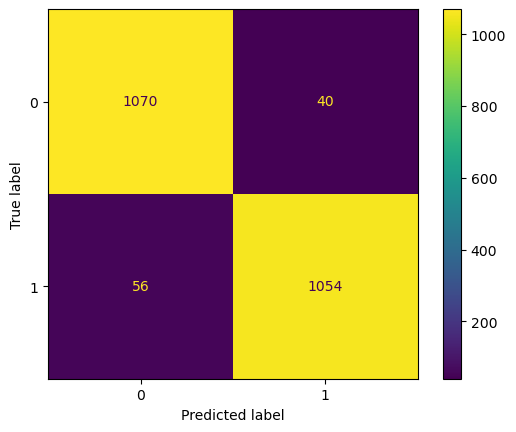

In [48]:
# Utilisation de ConfusionMatrixDisplay pour visualiser la matrice de confusion
# Cette fonction prend un estimateur (nav_bay), les données de test (X_test_scaled) et les étiquettes de test (y_test)
ConfusionMatrixDisplay.from_estimator(tree, X_test_scaled, y_test) 

==> Interprétation :
* Le modèle d'arbre de décision a une excellente précision globale de 96%, indiquant une capacité élevée à prédire correctement les deux classes.
* Les métriques de précision, de rappel et de F1-score sont très équilibrées entre les classes 0 (non attrition) et 1 (attrition), suggérant une capacité équitable du modèle à prédire les deux classes.
* Il semble que le modèle ait une excellente capacité à distinguer entre les employés qui restent et ceux qui partent, comme en témoignent les valeurs élevées de précision et de rappel.
* Ces résultats suggèrent que l'arbre de décision pourrait être un choix prometteur pour la prédiction de l'attrition dans ce contexte particulier.

### **RandomForest**

**Construction et entraînement d'un modèle de forêt aléatoire**

In [49]:
# Importation de la classe RandomForestClassifier du module sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Initialisation d'une instance du modèle de forêt aléatoire avec 10 arbres de décision
forest = RandomForestClassifier(n_estimators=10, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement standardisé (X_train_scaled, y_train)
forest.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

**Évaluation des performances du modèle de forêt aléatoire**

In [50]:
# Prédictions sur l'ensemble de test à l'aide du modèle de forêt aléatoire entraîné
attrition_predictions = forest.predict(X_test_scaled)

# Calcul de l'erreur quadratique moyenne (MSE) entre les prédictions et les vraies valeurs
forest_mse = mean_squared_error(y_test, attrition_predictions)

# Calcul de la racine carrée de l'erreur quadratique moyenne (RMSE)
forest_rmse = np.sqrt(forest_mse)

# Affichage de la valeur de RMSE, une métrique d'évaluation des performances du modèle
forest_rmse


0.1559625734730109

In [51]:
# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, attrition_predictions)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, attrition_predictions))

Précision du modèle : 0.98
Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1110
           1       0.98      0.97      0.98      1110

    accuracy                           0.98      2220
   macro avg       0.98      0.98      0.98      2220
weighted avg       0.98      0.98      0.98      2220



In [52]:
from sklearn.model_selection import cross_val_score
# Utilisation de la validation croisée pour évaluer la performance du modèle de classificateur Naive Bayes gaussien
# en utilisant la métrique de l'erreur quadratique moyenne négative (neg_mean_squared_error)
scores = cross_val_score(forest, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
# Calcul des RMSE correspondant à chaque fold de la validation croisée
forest_rmse_scores = np.sqrt(-scores)
# Affichage de la valeur de RMSE, une métrique d'évaluation des performances du modèle

forest_rmse_scores

array([0.17574991, 0.1389425 , 0.16439899, 0.18115886, 0.17574991,
       0.14572413, 0.16439899, 0.1389425 , 0.13193985, 0.15857196])

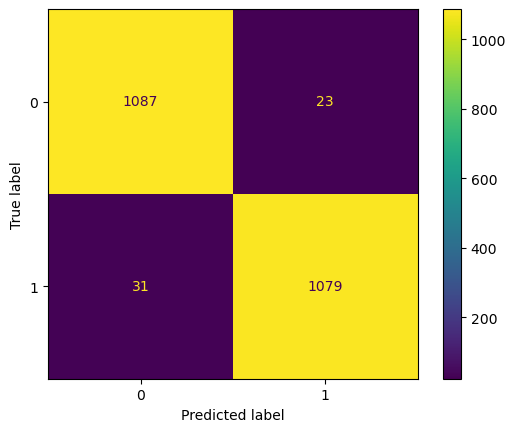

In [53]:
# Utilisation de ConfusionMatrixDisplay pour visualiser la matrice de confusion
# Cette fonction prend un estimateur (forest), les données de test (X_test_scaled) et les étiquettes de test (y_test)
ConfusionMatrixDisplay.from_estimator(forest, X_test_scaled, y_test) 

==> Interprétation :

* Le modèle de forêt aléatoire a une excellente précision globale de 98%, indiquant une capacité extrêmement élevée à prédire correctement les deux classes.
Les métriques de précision, de rappel et de F1-score montrent un équilibre exceptionnel entre les classes 0 (non attrition) et 1 (attrition), suggérant une capacité élevée du modèle à prédire les deux classes.

### **Gradient Boosting**

**Construction et entraînement d'un modèle de GradientBoosting**

In [54]:
# Importer la classe GradientBoostingClassifier du module sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Initialiser le modèle Gradient Boosting Classifier avec 100 arbres de décision et une graine aléatoire pour la reproductibilité
grd_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement (X_train_scaled, y_train)
grd_boost.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

**Évaluation des performances du modèle de forêt aléatoire**

In [55]:
# Faire des prédictions sur l'ensemble de test avec le modèle de Gradient Boosting (grd_boost)
attrition_predictions = grd_boost.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE) entre les vraies valeurs y_test et les prédictions attrition_predictions
grdBoost_mse = mean_squared_error(y_test, attrition_predictions)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE), qui donne une mesure plus interprétable
grdBoost_rmse = np.sqrt(grdBoost_mse)

# Afficher de la valeur finale de la RMSE pour le modèle de Gradient Boosting
print(f"\nLa RMSE du modèle de Gradient Boosting est : {grdBoost_rmse:.5f}\n")


La RMSE du modèle de Gradient Boosting est : 0.37127



In [56]:
# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, attrition_predictions)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, attrition_predictions))


Précision du modèle : 0.86
Rapport de classification :
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1110
           1       0.87      0.85      0.86      1110

    accuracy                           0.86      2220
   macro avg       0.86      0.86      0.86      2220
weighted avg       0.86      0.86      0.86      2220



In [57]:
# Utiliser cross_val_score pour évaluer le modèle de Gradient Boosting (grd_boost) avec la validation croisée
# Le scoring est défini comme "neg_mean_squared_error" pour obtenir les scores en termes d'erreur quadratique négative
# cv=10 spécifie la validation croisée avec 10 plis
scores = cross_val_score(grd_boost, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)

# Calculer la racine carrée de l'opposé des scores de l'erreur quadratique moyenne (RMSE)
grdBoost_rmse_scores = np.sqrt(-scores)

# Afficher de manière améliorée les scores de la RMSE résultants de la validation croisée pour le modèle de Gradient Boosting
print("\nScores de la RMSE résultants de la validation croisée (Gradient Boosting):\n")
for i, score in enumerate(grdBoost_rmse_scores, 1):
    print(f"Plis {i}: {score:.5f}")

# Calculer et afficher la moyenne et l'écart-type des scores
mean_rmse = np.mean(grdBoost_rmse_scores)
std_rmse = np.std(grdBoost_rmse_scores)

print("\nMoyenne de la RMSE : {:.5f}".format(mean_rmse))
print("Écart-type de la RMSE : {:.5f}\n".format(std_rmse))


Scores de la RMSE résultants de la validation croisée (Gradient Boosting):

Plis 1: 0.32880
Plis 2: 0.34874
Plis 3: 0.35424
Plis 4: 0.35150
Plis 5: 0.35424
Plis 6: 0.36232
Plis 7: 0.32880
Plis 8: 0.36232
Plis 9: 0.35999
Plis 10: 0.34349

Moyenne de la RMSE : 0.34944
Écart-type de la RMSE : 0.01175



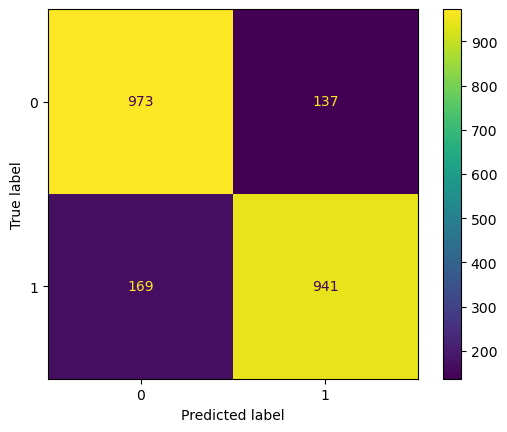

In [58]:
# Utilisation de ConfusionMatrixDisplay pour visualiser la matrice de confusion
# Cette fonction prend un estimateur (forest), les données de test (X_test_scaled) et les étiquettes de test (y_test)
ConfusionMatrixDisplay.from_estimator(grd_boost, X_test_scaled, y_test) 

==> Le modèle affiche une performance globale solide avec des scores équilibrés entre les classes 0 et 1. Les métriques élevées (précision, rappel, f1-score) suggèrent une capacité robuste du modèle à discriminer entre les deux classes. L'accuracy globale de 86% indique une précision fiable sur l'ensemble de test.

### **SVM**

On va tester la [_Support Vector Classifier_](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVc.html) avec un kernel linéaire 

**Construction et entraînement d'un modèle de SVM**

In [59]:
# Importer la classe SVC du module sklearn.svm
from sklearn.svm import SVC

# Initialiser le modèle SVM (SVC) avec un noyau linéaire et une graine aléatoire pour la reproductibilité
svc = SVC(kernel='linear', random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

**Évaluation des performances du modèle de SVM**

In [60]:
# Faire des prédictions sur l'ensemble de test avec le modèle SVC (Support Vector Classifier)
attrition_predictions = svc.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE) entre les vraies valeurs y_test et les prédictions attrition_predictions
svc_mse = mean_squared_error(y_test, attrition_predictions)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE), qui donne une mesure plus interprétable
svc_rmse = np.sqrt(svc_mse)

# Afficher de manière améliorée la valeur finale de la RMSE
print(f"\nLa RMSE du modèle SVC est : {svc_rmse:.5f}\n")


La RMSE du modèle SVC est : 0.53902



In [61]:
# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, attrition_predictions)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, attrition_predictions))

Précision du modèle : 0.71
Rapport de classification :
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1110
           1       0.72      0.68      0.70      1110

    accuracy                           0.71      2220
   macro avg       0.71      0.71      0.71      2220
weighted avg       0.71      0.71      0.71      2220



In [62]:
# Importer la fonction cross_val_score de sklearn.model_selection
from sklearn.model_selection import cross_val_score

# Utiliser cross_val_score pour évaluer un modèle (par exemple, svc) avec la validation croisée
# Le scoring est défini comme "neg_mean_squared_error" pour obtenir les scores en termes d'erreur quadratique négative
# cv=10 spécifie la validation croisée avec 10 plis
scores = cross_val_score(svc, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)

# Calculer la racine carrée de l'opposé des scores de l'erreur quadratique moyenne (RMSE)
# Note: scores sont négatifs car cross_val_score maximise la métrique (plus elle est grande, mieux c'est)
svc_rmse_scores = np.sqrt(-scores)

# Afficher les scores de la RMSE résultants de la validation croisée pour le modèle SVC
print("\nScores de la RMSE résultants de la validation croisée (SVC):\n")
for i, score in enumerate(svc_rmse_scores, 1):
    print(f"Plis {i}: {score:.5f}")


Scores de la RMSE résultants de la validation croisée (SVC):

Plis 1: 0.53271
Plis 2: 0.56609
Plis 3: 0.54170
Plis 4: 0.51988
Plis 5: 0.50671
Plis 6: 0.54348
Plis 7: 0.50671
Plis 8: 0.55577
Plis 9: 0.55631
Plis 10: 0.53864


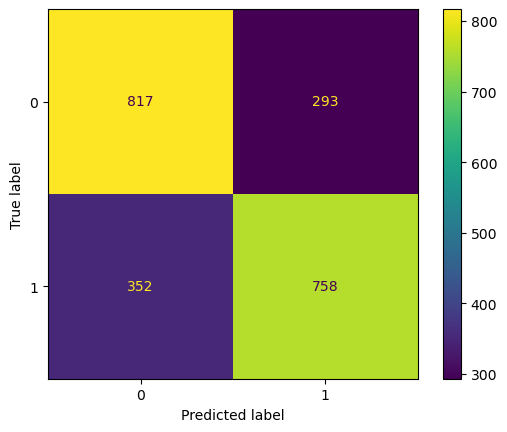

In [63]:
# Utilisation de ConfusionMatrixDisplay pour visualiser la matrice de confusion
# Cette fonction prend un estimateur (svc), les données de test (X_test_scaled) et les étiquettes de test (y_test)
ConfusionMatrixDisplay.from_estimator(svc, X_test_scaled, y_test) 

==> Le modèle de classification affiche une précision globale de 71%, avec des performances équilibrées entre les classes 0 et 1. Il prédit correctement 70% des cas pour la classe 0 et 72% pour la classe 1. Le rappel est de 74% pour la classe 0 et 68% pour la classe 1. L'accuracy globale du modèle est de 71%, indiquant une performance raisonnable, bien que des ajustements puissent être envisagés pour améliorer l'équilibre entre la précision et le rappel.

### Paramétrage du modèle (fine tuning)

Nous avons maintenant déterminé parmi les modèles envisagés quelques bon candidats. Il s'agit maintenant d'optimiser leur paramétrage.
La première idée serait de tester a la mano diverses valeurs de chaque hyper-paramètre du modèle mais cette approche s'avèrerait fastidieuse, surtout si leur nombre était important.

Voyons comment procéder.

#### **Randomized Search**

#### Randomized Search

Une autre méthode, qui passe mieux à l'échelle d'un grand espace de recherche de paramètres, et la recherche randomisée. Elle est similaire dans son utilisation à grid search mais fixe au hasard la valeur des paramètres dans un intervalle donné. On a le contrôle sur le nombre d'itérations et sur les intervalles de recherche. Essayons [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) avec 10 itérations :

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Création du modèle RandomForestRegressor
rf_classifier = RandomForestClassifier()

# Définir la grille des hyperparamètres avec des distributions pour la recherche aléatoire
param_dist = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}
# Création de l'instance RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Entraînement du modèle avec la recherche aléatoire
random_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", random_search.best_params_)

KeyboardInterrupt: 

**Affichons les scores obtenus et commentons-les :**

In [ ]:
# Accéder aux résultats de la recherche aléatoire (random_search)
cv_results = random_search.cv_results_

# Créer une liste de tuples (rank, mean_score, std_score, params) pour chaque itération
results_sorted_by_rank = sorted(zip(cv_results['rank_test_score'], cv_results['mean_test_score'], cv_results['std_test_score'], cv_results['params']), key=lambda x: x[0])

# Afficher les résultats triés par ordre décroissant de rank
for i, (rank, mean_score, std_score, params) in enumerate(results_sorted_by_rank, start=1):
    print(f"Iteration {i}:\n"
          f" Rank : {rank}\n"  # Classement de cette combinaison parmi toutes les combinaisons testées
          f" Score moyen : {np.sqrt(-mean_score)}\n"  # Score moyen converti en RMSE (racine carrée de l'erreur quadratique moyenne)
          f" Écart type : {std_score}\n"  # Écart type des scores de validation croisée
          f" Paramétrage : {params}\n"  # Combinaison spécifique d'hyperparamètres testée
          f"{'-' * 40}\n")  # Ajoute une ligne de séparation entre les itérations


Iteration 1:
 Rank : 1
 Score moyen : 0.14967182872771947
 Écart type : 0.0034705412799530865
 Paramétrage : {'max_features': 3, 'n_estimators': 88}
----------------------------------------

Iteration 2:
 Rank : 2
 Score moyen : 0.15412010792252626
 Écart type : 0.005576982296026331
 Paramétrage : {'max_features': 3, 'n_estimators': 150}
----------------------------------------

Iteration 3:
 Rank : 3
 Score moyen : 0.15474574107556882
 Écart type : 0.005006802098785948
 Paramétrage : {'max_features': 3, 'n_estimators': 75}
----------------------------------------

Iteration 4:
 Rank : 4
 Score moyen : 0.16325190763613615
 Écart type : 0.004592630939520448
 Paramétrage : {'max_features': 3, 'n_estimators': 72}
----------------------------------------

Iteration 5:
 Rank : 5
 Score moyen : 0.17019925870414312
 Écart type : 0.0046038291443741865
 Paramétrage : {'max_features': 5, 'n_estimators': 100}
----------------------------------------

Iteration 6:
 Rank : 6
 Score moyen : 0.175779

### Analyser les meilleurs modèles

In [ ]:
# Accéder aux importances des caractéristiques du meilleur modèle trouvé par la recherche aléatoire
feature_importances = random_search.best_estimator_.feature_importances_

# Afficher les importances de chaque caractéristique
print("\nImportance des caractéristiques pour le meilleur modèle :")
for i, importance in enumerate(feature_importances, start=1):
    print(f"{X_train_scaled.columns[i-1]}: Importance = {importance:.4f}")

# Les importances des caractéristiques indiquent la contribution relative de chaque caractéristique dans la prise de décision du modèle.
# Plus l'importance est élevée, plus la caractéristique est considérée comme influente dans les prédictions du modèle.


Importance des caractéristiques pour le meilleur modèle :
tauxSatisfactionGlobal: Importance = 0.1623
Age: Importance = 0.1476
Department: Importance = 0.0406
TotalWorkingYears: Importance = 0.1598
YearsAtCompany: Importance = 0.1382
YearsWithCurrManager: Importance = 0.1258
difference_temps: Importance = 0.2257


### Evaluation sur le _jeu de test_

Notre travail ayant abouti a un résultat suffisamment performant, nous pouvons enfin passer à l'évaluation du modèle sur le test set. On applique le pipeline de transformation à ce jeu de test.

**Remarque** : c'est `transform()` et non `fit_transform()` que l'on utilise. Le _pipeline_ a été entraîné sur le jeu d'entraînement pour le calcul des médianes, les mises à l'échelles, _etc_.

In [ ]:
# Sélectionner le meilleur estimateur à partir de la recherche aléatoire (random_search)
final_model = random_search.best_estimator_

In [ ]:
# Entraîner le modèle sur l'ensemble d'entraînement
final_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_features=3, n_estimators=88)

In [ ]:
# Faire des prédictions sur l'ensemble de test avec le modèle final
attrition_predictions = final_model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE) entre les vraies valeurs y_test et les prédictions attrition_predictions
final_model_mse = mean_squared_error(y_test, attrition_predictions)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE), qui donne une mesure plus interprétable
final_model_rmse = np.sqrt(final_model_mse)

# Afficher la valeur finale de la RMSE, une métrique courante pour évaluer la performance d'un modèle de régression
final_model_rmse

0.0995485304256668

In [ ]:
# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, attrition_predictions)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, attrition_predictions))

Précision du modèle : 0.99
Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1110
           1       0.99      0.99      0.99      1110

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220



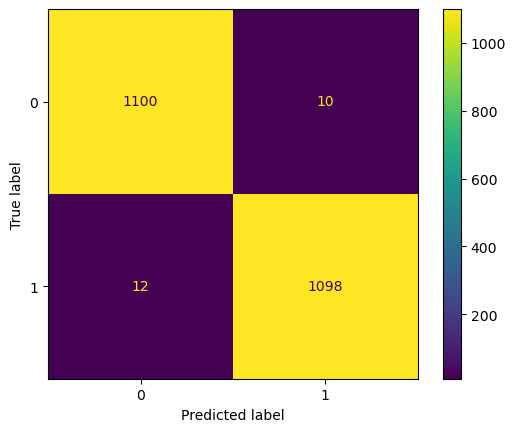

In [ ]:
# Utilisation de ConfusionMatrixDisplay pour visualiser la matrice de confusion
# Cette fonction prend un estimateur (final_model), les données de test (X_test_scaled) et les étiquettes de test (y_test)
ConfusionMatrixDisplay.from_estimator(final_model, X_test_scaled, y_test) 

#### Grid Search



scikit-learn propose la fonction [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) pour automatiser ce travail. Il faut lui fournir les valeurs à tester pour chaque hyperparamètre. Toutes les combinaisons sont évaluées par cross-validation.

**Remarque** : Il n'est pas nécessaire **aujourd'hui** de se soucier de la signification des hyperparamètres. Ce n'est pas l'objet de ce _workshop_. Il sera cependant important à l'avenir de connaître les arcanes des algorithmes de _ML_ car se sont vos outils de travail.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grille des hyperparamètres à tester
param_grid = [
    # essaye 12 (3×4) combinaisons des hyperparametres
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # puis essaye 6 (2×3) combinaisons avec bootstrap à False (True étant la valeur par défaut)
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# Modèle à optimiser
forest_reg = RandomForestClassifier(random_state=42)

# Création de l'instance GridSearchCV
# 5 sous-jeux de cross-val, ça fait en tout (12+6)*5=90 tours d'entraînement 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)


# Entraînement du modèle avec recherche des meilleurs hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

**Remarque** : le meilleur résultat étant obtenu pour les plus grandes valeurs testées, il semblerait pertinent de proposer des valeurs encore plus grandes au `GridSearchCV`.

On peur obtenir directement le meilleur modèle :


In [ ]:
# Sélectionner le meilleur modèle trouvé par la recherche sur grille (grid_search)
grid_search.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=30, random_state=42)

**Remarque** : si `GridSearchCV` reçoit le paramètre `refit=True` (comportement par défaut), le modèle est ré-entraîné sur tout le _training set_ avec le meilleur paramétrage trouvé. Celà peut s'avérer très utile si notre modèle est entraîné et paramétré en production avec des mises à jour du jeu d'entraînement.

Les scores de cross-validations calculés sont évidemment accessibles. A vous d'afficher le score moyen pour chaque paramétrage.

In [ ]:
# Accéder aux résultats de la recherche aléatoire (random_search)
cv_res = grid_search.cv_results_

# Afficher le score moyen pour chaque paramétrage
for i, (mean_score, params) in enumerate(zip(cv_res["mean_test_score"], cv_res["params"]),start=1):
    #print(f"Iteration {i}:\n Score moyen: {np.sqrt(-mean_score)}, Paramétrage: {params}")
    print(f"Iteration {i}:\n"
          f"   Score moyen: {np.sqrt(-mean_score)}\n"
          f"   Paramétrage: {params}\n"
          f"{'-' * 40}\n")  # Ajoute une ligne de séparation entre les itérations



Iteration 1:
   Score moyen: 0.23665312242293876
   Paramétrage: {'max_features': 2, 'n_estimators': 3}
----------------------------------------

Iteration 2:
   Score moyen: 0.18436296805406444
   Paramétrage: {'max_features': 2, 'n_estimators': 10}
----------------------------------------

Iteration 3:
   Score moyen: 0.15965615039719444
   Paramétrage: {'max_features': 2, 'n_estimators': 30}
----------------------------------------

Iteration 4:
   Score moyen: 0.24468002681152673
   Paramétrage: {'max_features': 4, 'n_estimators': 3}
----------------------------------------

Iteration 5:
   Score moyen: 0.1910539053839631
   Paramétrage: {'max_features': 4, 'n_estimators': 10}
----------------------------------------

Iteration 6:
   Score moyen: 0.1690634004302589
   Paramétrage: {'max_features': 4, 'n_estimators': 30}
----------------------------------------

Iteration 7:
   Score moyen: 0.25244925239535343
   Paramétrage: {'max_features': 6, 'n_estimators': 3}
------------------

### Evaluation sur le _jeu de test_

In [ ]:
# Sélectionner le meilleur estimateur à partir de la recherche sur grille (grid_search)
final_model1 = grid_search.best_estimator_

# Afficher le modèle final1
final_model1

RandomForestClassifier(max_features=2, n_estimators=30, random_state=42)

In [ ]:
# Entraîner le modèle sur l'ensemble d'entraînement
final_model1.fit(X_train_scaled, y_train)

RandomForestClassifier(max_features=2, n_estimators=30, random_state=42)

In [ ]:
# Faire des prédictions sur l'ensemble de test avec le modèle final_model1
attrition_predictions = final_model1.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE) entre les vraies valeurs y_test et les prédictions attrition_predictions
final_model1_mse = mean_squared_error(y_test, attrition_predictions)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE), qui donne une mesure plus interprétable
final_model1_rmse = np.sqrt(final_model1_mse)

# Afficher le RMSE, qui est une métrique courante pour évaluer la performance d'un modèle de classification
print(f" La racine carrée de l'erreur quadratique moyenne (RMSE) est : {final_model1_rmse:.5f}\n")

 La racine carrée de l'erreur quadratique moyenne (RMSE) est : 0.11231



In [ ]:
# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, attrition_predictions)
print(f"Précision du modèle : {accuracy:.2f}")

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, attrition_predictions))

Précision du modèle : 0.99
Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1110
           1       0.99      0.99      0.99      1110

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220



<h3>Interprétation des Résultats</h3>
    <p>Les résultats du modèle de classification indiquent une performance exceptionnelle. La précision globale du modèle est de 0.99, témoignant d'une classification précise et équilibrée des deux classes.</p>
    <h4>Résultats par classe :</h4>
    <table>
        <tr>
            <th>Classe</th>
            <th>Précision</th>
            <th>Rappel</th>
        </tr>
        <tr>
            <td>Classe 0 (Étiquette négative)</td>
            <td>0.98 : 98% des prédictions positives sont correctes.</td>
            <td>0.99 : 99% des vrais positifs ont été identifiés.</td>
        </tr>
        <tr>
            <td>Classe 1 (Étiquette positive)</td>
            <td>0.99 : 99% des prédictions positives sont correctes.</td>
            <td>0.98 : 98% des vrais positifs ont été identifiés.</td>
        </tr>
    </table>
    <p>Le modèle démontre une performance élevée avec des valeurs de précision et de rappel importantes pour chaque classe. L'accuracy globale du modèle est également très élevée à 0.99, confirmant sa capacité à effectuer des prédictions précises sur l'ensemble des données.</p>

#### Sauvegarde / chargement d'un modèle 



On peut sauvegarder et recharger un modèle grâce à [`joblib`](https://scikit-learn.org/stable/modules/model_persistence.html). C'est utile lorsque l'entraînement de ce modèle a nécessité beaucoup de temps-machine. Ce n'est pas très utile dans notre cas car les modèles sont simples et le jeu de données est peu volumineux. Nous allons tout de même sauvegarder et charger un modèle pour l'exemple.

In [ ]:
# Importer la bibliothèque joblib pour la sauvegarde du modèle
import joblib

# Sauvegarder le modèle final sous le nom "Attrition_RandomForest_Predictor.pkl"
joblib.dump(final_model, "Attrition_RandomForest_Predictor.pkl")

['Attrition_RandomForest_Predictor.pkl']

In [ ]:
# Charger le modèle enregistré à partir du fichier "Attrition_RandomForest_Predictor.pkl"
my_loaded_model = joblib.load("Attrition_RandomForest_Predictor.pkl")


In [ ]:
# Faire des prédictions sur l'ensemble de test avec le modèle chargé
attrition_predictions = my_loaded_model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (MSE) entre les vraies valeurs et les prédictions
my_loaded_model_mse = mean_squared_error(y_test, attrition_predictions)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE), qui donne une mesure plus interprétable
my_loaded_model_rmse = np.sqrt(my_loaded_model_mse)

# Afficher le RMSE, qui est une métrique courante pour évaluer la performance d'un modèle
print(f"RMSE : {my_loaded_model_rmse:.5f}")
print("\nPerformance du modèle chargé :")
print(f"Précision du modèle : {accuracy:.2f}")

RMSE : 0.09955

Performance du modèle chargé :
Précision du modèle : 0.99


#### **Analyse Comparative : Prédictions d'Attrition vs Réalité (y_test)**

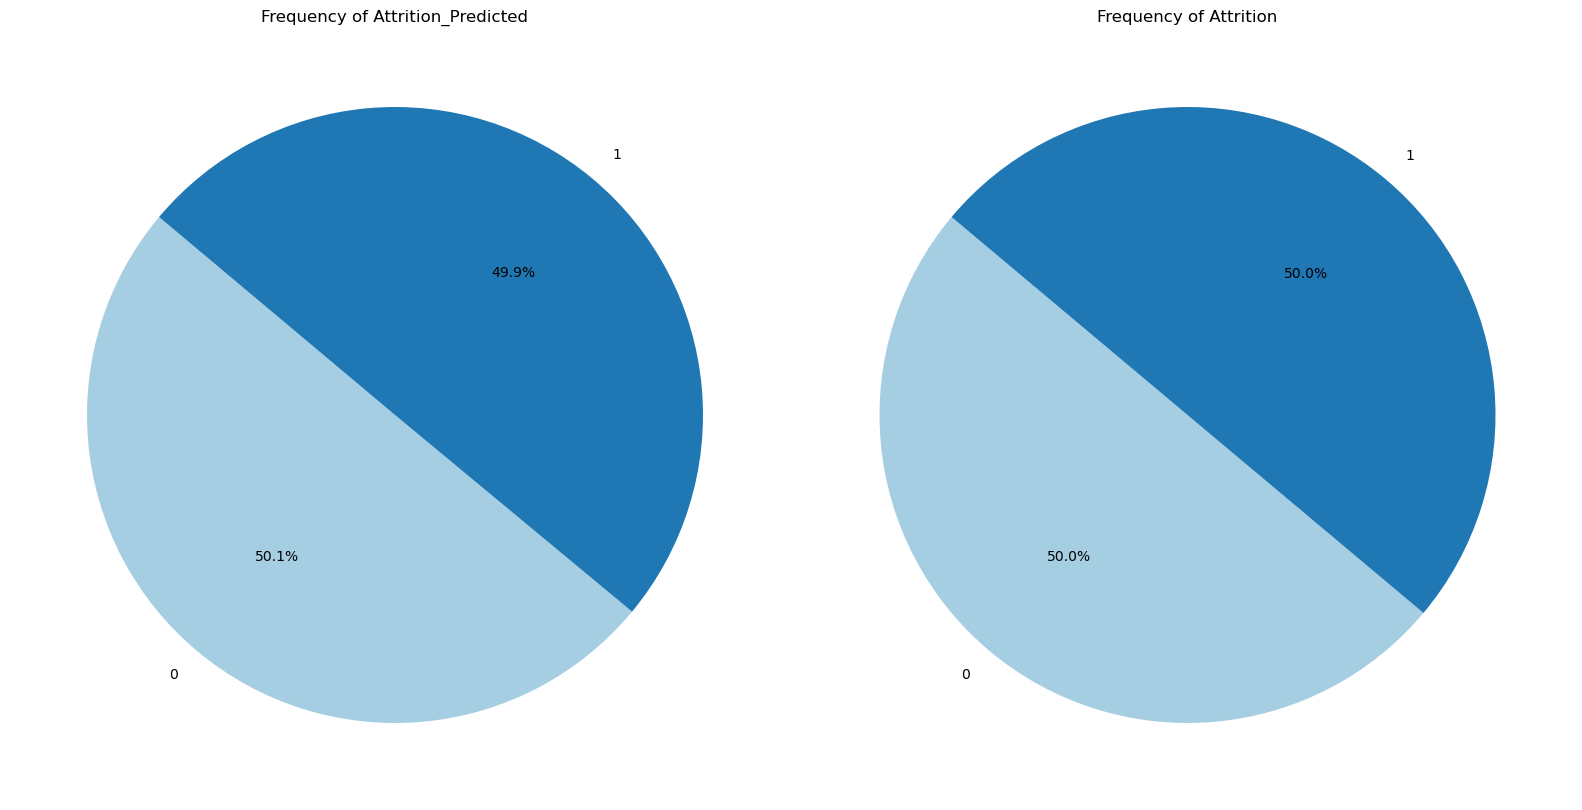

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_object_feature_pie(data_frame, feature, ax):
    if data_frame[feature].dtype == 'O':
        # Calculate value counts for the feature
        value_counts = data_frame[feature].value_counts()

        # Plot the pie chart
        ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        ax.set_title(f'Frequency of {feature}')

# Create a figure with two subplots in one row
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Call the function for the first pie chart
visualize_object_feature_pie(pd.DataFrame({'Attrition_Predicted': attrition_predictions}, dtype='object'), 'Attrition_Predicted', axs[0])

# Call the function for the second pie chart
visualize_object_feature_pie(pd.DataFrame(y_test, dtype='object'), 'Attrition', axs[1])

# Adjust layout
plt.tight_layout()

# Show the combined subplot
plt.show()


<h1>Conclusion :</h1>
    <p>Après une analyse approfondie du projet, nous avons identifié des attributs spécifiques qui présentent une corrélation significative avec le phénomène d'attrition des employés. Ces attributs incluent le "Taux de Satisfaction Global", l'"Âge", le "Département", le "Total des Années de Travail", les "Années à la Société", les "Années avec le Manager Actuel", l'"Heure Moyenne de Fin", et la "Différence de Temps". Ces facteurs jouent un rôle essentiel dans la compréhension des éléments liés à la prise de décision des employés de quitter l'entreprise.</p>
    <h2>Solutions Proposées pour Diminuer l'Attrition :</h2>
    <h3>1. Amélioration de la Satisfaction Globale :</h3>
    <ul>
        <li>Mettre en œuvre des enquêtes de satisfaction des employés pour identifier les domaines d'amélioration.</li>
        <li>Créer un environnement de travail positif et favorable.</li>
    </ul>
    <h3>2. Gestion de l'Âge et du Département :</h3>
    <ul>
        <li>Personnaliser les programmes de développement professionnel en fonction des groupes d'âge.</li>
        <li>Mettre en place des initiatives spécifiques au département pour répondre aux besoins uniques de chaque équipe.</li>
    </ul>
    <h3>3. Gestion du Temps de Travail et des Relations avec les Managers :</h3>
    <ul>
        <li>Offrir une flexibilité accrue dans les horaires de travail.</li>
        <li>Fournir des formations en gestion pour améliorer les compétences relationnelles des managers.</li>
    </ul>
    <h3>4. Programmes de Retention :</h3>
    <ul>
        <li>Mettre en place des incitations financières pour la rétention à long terme.</li>
        <li>Offrir des opportunités de carrière claires et des plans de développement individuels.</li>
    </ul>
    <h3>5. Évaluation Continue et Adaptation :</h3>
    <ul>
        <li>Mettre en place un système de feedback régulier pour suivre la satisfaction des employés.</li>
        <li>Adapter les stratégies en fonction des évolutions du marché du travail et des besoins des employés.</li>
    </ul>
    <p>En adoptant ces mesures, l'entreprise peut espérer réduire l'attrition des employés, améliorer la rétention du personnel clé, et créer un environnement de travail propice à la croissance professionnelle et au bien-être général des employés. Il est important de maintenir une communication ouverte avec les employés et de surveiller régulièrement les indicateurs de satisfaction pour garantir l'efficacité des solutions mises en œuvre.</p>